In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
#import tikzplotlib

In [16]:
def traffic_cost(bytes_model, config, topology, bytes_selection, comm_round, num_clients):
    #print("configgggg:", config)
    if topology == 'grid':
        all_degree = 48
    elif topology == 'roc':
        all_degree = 56
    if 'SDPSrandom' in config or 'pasgdrandom'in config:
        model_exchange = (bytes_model * num_clients) / (1024 * 1024)
        return model_exchange * comm_round
    elif 'SDPS' in config or 'noKD' in config:
      
        selection = (bytes_selection * all_degree) / (1024 * 1024)
        model_exchange = (bytes_model * num_clients) / (1024 * 1024)
        return (selection + model_exchange) * comm_round
    else:
        model_exchange = (bytes_model * all_degree) / (1024 * 1024)
        return model_exchange * comm_round

Accuracy for SDPS-cifar10-cnn-lastfc at 562 seconds is 69.41%
grid: SDPS-cifar10-cnn-lastfc reached 55% accuracy at 85.48 seconds, with communication cost of 35463.48, which corresponds to epoch 650.
Accuracy for SDPSrandom-cifar10-cnn-lastfc at 562 seconds is 66.45%
grid: SDPSrandom-cifar10-cnn-lastfc reached 55% accuracy at 117.90 seconds, with communication cost of 48259.53, which corresponds to epoch 900.
Accuracy for pasgd-cifar10-cnn-alpha0.2 at 562 seconds is 61.71%
grid: pasgd-cifar10-cnn-alpha0.2 reached 55% accuracy at 164.74 seconds, with communication cost of 184994.88, which corresponds to epoch 1150.
Accuracy for dsgd-cifar10-cnn-alpha0.2 at 562 seconds is 49.53%
grid: dsgd-cifar10-cnn-alpha0.2 did not reach the desired accuracy within the tested duration.


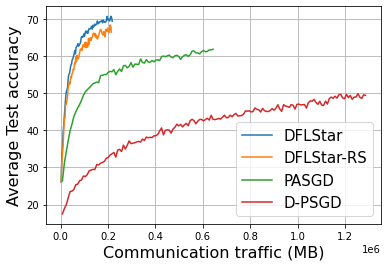

Accuracy for SDPS-cifar10-cnn-lastfc at 562 seconds is 69.34%
roc: SDPS-cifar10-cnn-lastfc reached 55% accuracy at 107.00 seconds, with communication cost of 43772.36, which corresponds to epoch 800.
Accuracy for SDPSrandom-cifar10-cnn-lastfc at 562 seconds is 65.27%
roc: SDPSrandom-cifar10-cnn-lastfc reached 55% accuracy at 144.93 seconds, with communication cost of 58983.87, which corresponds to epoch 1100.
Accuracy for pasgd-cifar10-cnn-alpha0.2 at 562 seconds is 65.08%
roc: pasgd-cifar10-cnn-alpha0.2 reached 55% accuracy at 131.44 seconds, with communication cost of 140756.97, which corresponds to epoch 750.
Accuracy for dsgd-cifar10-cnn-alpha0.2 at 562 seconds is 56.45%
roc: dsgd-cifar10-cnn-alpha0.2 reached 55% accuracy at 487.31 seconds, with communication cost of 1060369.20, which corresponds to epoch 5650.


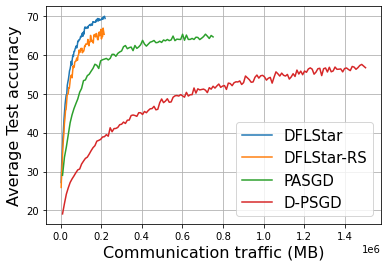

Accuracy for SDPS-cifar100-cnn-lastfc at 562 seconds is 41.69%
grid: SDPS-cifar100-cnn-lastfc did not reach the desired accuracy within the tested duration.
Accuracy for SDPSrandom-cifar100-cnn-lastfc at 562 seconds is 39.86%
grid: SDPSrandom-cifar100-cnn-lastfc did not reach the desired accuracy within the tested duration.
Accuracy for pasgd-cifar100-cnn-alpha0.2 at 562 seconds is 35.53%
grid: pasgd-cifar100-cnn-alpha0.2 did not reach the desired accuracy within the tested duration.
Accuracy for dsgd-cifar100-cnn-alpha0.2 at 562 seconds is 27.71%
grid: dsgd-cifar100-cnn-alpha0.2 did not reach the desired accuracy within the tested duration.


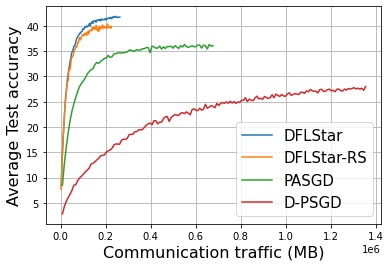

Accuracy for SDPS-cifar100-cnn-lastfc at 562 seconds is 41.06%
roc: SDPS-cifar100-cnn-lastfc did not reach the desired accuracy within the tested duration.
Accuracy for SDPSrandom-cifar100-cnn-lastfc at 562 seconds is 39.16%
roc: SDPSrandom-cifar100-cnn-lastfc did not reach the desired accuracy within the tested duration.
Accuracy for pasgd-cifar100-cnn-alpha0.2 at 562 seconds is 37.93%
roc: pasgd-cifar100-cnn-alpha0.2 did not reach the desired accuracy within the tested duration.
Accuracy for dsgd-cifar100-cnn-alpha0.2 at 562 seconds is 31.25%
roc: dsgd-cifar100-cnn-alpha0.2 did not reach the desired accuracy within the tested duration.


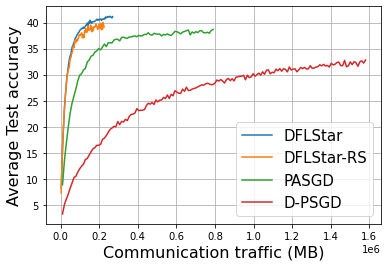

In [17]:
import os
import matplotlib.pyplot as plt

def generate_confidence_interval(ys, number_per_g = 30, number_of_g = 1000, low_percentile = 1, high_percentile = 99):
    means = []
    mins =[]
    maxs = []
    for i,y in enumerate(ys.T):
        y = bootstrapping(y, number_per_g, number_of_g)
        #print("y:", y)
        means.append(np.mean(y))
        mins.append(np.percentile(y, low_percentile))
        #print("mins:", mins)
        maxs.append(np.percentile(y, high_percentile))
        #print("maxs:", maxs)
    return np.array(means), np.array(mins), np.array(maxs)


def read_log_file(log_file_path):
    values = []
    with open(log_file_path, 'r') as file:
        for line in file:
            value = float(line.strip())
            values.append(value)
    return values

def get_configurations(alpha, dataset):
    # Dictionary to hold configurations based on alpha and dataset
    config_options = {
        (0.2, 'cifar10'): ['SDPS-cifar10-cnn-lastfc', 'SDPSrandom-cifar10-cnn-lastfc', 'pasgd-cifar10-cnn-alpha0.2', 'dsgd-cifar10-cnn-alpha0.2'],
        (0.2, 'cifar100'): ['SDPS-cifar100-cnn-lastfc', 'SDPSrandom-cifar100-cnn-lastfc', 'pasgd-cifar100-cnn-alpha0.2', 'dsgd-cifar100-cnn-alpha0.2'],
        (0.5, 'cifar10'): ['SDPS-cifar10-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar10-cnn-lastfc-alpha0.5', 'pasgd-cifar10-cnn-alpha0.5', 'dsgd-cifar10-cnn-alpha0.5'],
        (0.5, 'cifar100'): ['SDPS-cifar100-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar100-cnn-lastfc-alpha0.5', 'pasgd-cifar100-cnn-alpha0.5', 'dsgd-cifar100-cnn-alpha0.5'],
        # ... Add other configurations ...
    }
    return config_options.get((alpha, dataset), [])

datasets = ['cifar10', 'cifar100']
alphas = [0.2]
topologies = [('grid', 'grid'), ('clique-ring', 'roc')]  # (topology, topology_name)


time_of_accuracy = 562
time_to_accuracy = 55
size_byte_model = 3514152 
#size_byte_selection = 204800

num_devices = 16
num_epochs = 8000
#topology = 'clique-ring'
#topology_name = 'roc'
#topology = 'grid'
noniid = 0.9
num_test_folders = 5  # Number of test folders



#total_time = 562  # total duration of the experiment in seconds
#time_per_epoch = total_time / 160 


# Define total time for each configuration
total_times = {
    'dsgd-cifar10-cnn': 562,  # Example time in seconds, add other configurations with their times
    'SDPS-cifar10-cnn-lastfc-0.1': 381,
    'pasgd-cifar10-cnn-alpha0.5': 572,
    'pasgd-cifar100-cnn-alpha0.05': 572,
    #'SDPS-cifar10-cnn-lastfc-alpha0.5': 381,
    'SDPS-cifar100-cnn-lastfc-alpha0.05': 762,
    'SDPS-cifar100-cnn-lastfc-alpha0.05': 762

}
epochs_dict = {
    'dsgd-cifar10-cnn': 8000,  # Example time in seconds, add other configurations with their times
    'SDPS-cifar10-cnn-lastfc-0.1': 2000,
    'pasgd-cifar10-cnn-alpha0.5': 4000,
    
}




for dataset in datasets:
    for alpha in alphas:
        configurations = get_configurations(alpha, dataset)

        for topology, topology_name in topologies:        
            for config in configurations:
                if 'pasgd' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 573
                        else:
                            total_times[config] = 701
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 719
                     
                    config_labels[config] = 'PASGD'
                elif 'dsgd' in config:
                    epochs_dict[config] = 8000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 564
                        else:
                            total_times[config] = 690
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 700
           
                    config_labels[config] = 'D-PSGD'
                elif 'SDPS' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 526
                        else:
                            total_times[config] = 535
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 546
                        else:
                            total_times[config] = 564
            
                    config_labels[config] = 'DFLStar'
                if 'SDPSrandom' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 524
                        else:
                            total_times[config] = 527
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 538
                        else:
                            total_times[config] = 546
                    config_labels[config] = 'DFLStar-RS'
                if 'noKD' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 408
                        else:
                            total_times[config] = 458
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 428
                        else:
                            total_times[config] = 491
                    config_labels[config] = 'DFLStar-noKD'   
                all_tests_average_values = []
                all_tests_traffic_values = [] 

                total_time = total_times.get(config, 762)
                num_epochs = epochs_dict.get(config, 4000)

                for test_folder_num in range(1, num_test_folders + 1):
                    config_folder = f"KDD2024/pdsgd-noniid-test{test_folder_num}-{num_devices}C-{config}-{topology}-1sgd-{num_epochs}epochs"
                #config_folder = f"16_grid/pdsgd-noniid-test1-{num_devices}W-{topology}-1sgd-{num_epochs}epochs-{config}"
                    config_values = []
                    traffic_values = []

                    for device_num in range(num_devices):
                        log_file_path = os.path.join(config_folder, f"r{device_num}-testacc.log")
                        #log_file_path = os.path.join(config_folder, f"r0-testacc.log")
                        values = read_log_file(log_file_path)
                        config_values.append(values)
                        
                    
                    if dataset == 'cifar10':
                        size_byte_selection = 20480
                        size_byte_model = 3514152
                    elif dataset == 'cifar100':
                        size_byte_selection = 204800
                        size_byte_model = 3698832
                    for i in range(len(values)):
                            traffic_cost_value = traffic_cost(size_byte_model, config, topology_name, size_byte_selection, (i + 1)*50, num_devices)
                            if len(traffic_values) > i:
                                traffic_values[i] += traffic_cost_value
                            else:
                                traffic_values.append(traffic_cost_value)

                        #numepochs = len(read_log_file(log_file_path))
                        #time_per_epoch = total_time / numepochs

                    # Compute average for each epoch for the current test folder
                    average_values = [sum(epoch_values) / num_devices for epoch_values in zip(*config_values)]

                    # Aggregate the averages from this test folder
                    if all_tests_average_values:
                        all_tests_average_values = [sum(x) for x in zip(all_tests_average_values, average_values)]
                        all_tests_traffic_values = [sum(x) for x in zip(all_tests_traffic_values, traffic_values)]
                    else:
                        all_tests_average_values = average_values
                        all_tests_traffic_values = traffic_values

                # Compute the final average across all test folders
                final_average_values = [x / num_test_folders for x in all_tests_average_values]
                final_traffic_values = [x / num_test_folders for x in all_tests_traffic_values]
                #final_traffic_values = [x / num_test_folders for x in all_tests_traffic_values]
                
#                 for i, acc in enumerate(final_average_values):
#                     traffic_cost_value = traffic_cost(size_byte_model, config, size_byte_selection, i + 1, num_devices)
#                     all_tests_traffic_values.append(traffic_cost_value)

                numepochs = len(final_average_values)
                time_per_epoch = total_time / numepochs

                times = [epoch * time_per_epoch for epoch in range(1, len(final_average_values) + 1)]

                epochs = list(range(1, len(final_average_values) + 1))
                plot_epochs = epochs[:2000:]
                #rounds = np.arange(1, num_epochs + 1)  
                #plt.plot(plot_epochs, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                if config == 'SDPS-cifar10-cnn-lastfc-0.1':
                    # Plot every 50 intervals for this specific configuration
                    plt.plot(times[::50], final_average_values[::50], label=config_labels.get(config, config))
                else:
                    # Plot normally for other configurations
                    plt.plot(final_traffic_values, final_average_values, label=config_labels.get(config, config))
                    #plt.plot(times, final_average_values, label=config_labels.get(config, config))
                #plt.plot(times, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                #print(f"Accuracy for {config} is {final_average_values [-1]:.2f}")
                accuracy_at_time = np.interp(time_of_accuracy, times, final_average_values)
                print(f"Accuracy for {config} at {time_of_accuracy} seconds is {accuracy_at_time:.2f}%")

                time_acc = None
                for i, acc in enumerate(final_average_values):
                    if acc >= time_to_accuracy:
                        time_acc = times[i]           
                        break

                if time_acc is not None:
                    round_to_accuracy = int(time_acc / time_per_epoch)*50
                    if dataset == 'cifar10':
                        size_byte_selection = 20480
                        size_byte_model = 3514152
                    elif dataset == 'cifar100':
                        size_byte_selection = 204800
                        size_byte_model = 3698832
                    megabytes_value = traffic_cost(size_byte_model, config, topology_name, size_byte_selection, round_to_accuracy, num_devices)

                    print(f"{topology_name}: {config} reached {time_to_accuracy}% accuracy at {time_acc:.2f} seconds, with communication cost of {megabytes_value:.2f}, which corresponds to epoch {round_to_accuracy}.")


                else:
                    print(f"{topology_name}: {config} did not reach the desired accuracy within the tested duration.")

                    #    megabytes_value = traffic_cost(size_byte_model, config, size_byte_selection, 2000, num_devices)
                    #    print(f"{config} reached communication cost of {megabytes_value:.2f}, which corresponds to epoch 2000")
    
            plt.ylabel('Average Test accuracy', fontsize=16 )
            plt.xlabel('Communication traffic (MB)', fontsize=16)
#            plt.xlim(left=20)
#             if dataset == 'cifar10':
#                 plt.ylim(10,80)
#             elif dataset == 'cifar100':
#                 plt.ylim(0,50)
            #plt.title('Average Test Accuracy Across Clients and Test Files')
            #plt.grid(True)
            plt.grid()
            fig = plt.gcf()
            #fig.set_size_inches(18.5, 10.5)
            plt.legend(fontsize=15)
            plt.savefig(f"traffic-{dataset}-{topology_name}-alpha-{alpha}.pdf", bbox_inches='tight')
            plt.show()


Accuracy for SDPS-cifar10-cnn-lastfc at 524 seconds is 69.72%
SDPS-cifar10-cnn-lastfc in grid reached 55% accuracy at 85.48 seconds, with communication cost of 35463.48, which corresponds to epoch 650.
Accuracy for SDPSrandom-cifar10-cnn-lastfc at 524 seconds is 66.45%
SDPSrandom-cifar10-cnn-lastfc in grid reached 55% accuracy at 117.90 seconds, with communication cost of 48259.53, which corresponds to epoch 900.
Accuracy for pasgd-cifar10-cnn-alpha0.2 at 524 seconds is 60.73%
pasgd-cifar10-cnn-alpha0.2 in grid reached 55% accuracy at 164.74 seconds, with communication cost of 184994.88, which corresponds to epoch 1150.
Accuracy for dsgd-cifar10-cnn-alpha0.2 at 524 seconds is 48.62%
dsgd-cifar10-cnn-alpha0.2 in grid did not reach the desired accuracy within the tested duration.


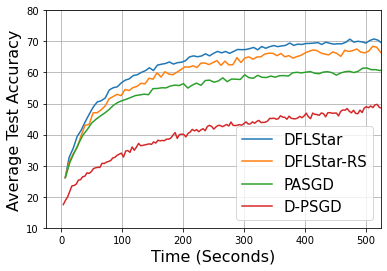

Accuracy for SDPS-cifar10-cnn-lastfc at 524 seconds is 69.82%
SDPS-cifar10-cnn-lastfc in clique-ring reached 55% accuracy at 107.00 seconds, with communication cost of 43772.36, which corresponds to epoch 800.
Accuracy for SDPSrandom-cifar10-cnn-lastfc at 524 seconds is 65.59%
SDPSrandom-cifar10-cnn-lastfc in clique-ring reached 55% accuracy at 144.93 seconds, with communication cost of 58983.87, which corresponds to epoch 1100.
Accuracy for pasgd-cifar10-cnn-alpha0.2 at 524 seconds is 63.88%
pasgd-cifar10-cnn-alpha0.2 in clique-ring reached 55% accuracy at 131.44 seconds, with communication cost of 140756.97, which corresponds to epoch 750.
Accuracy for dsgd-cifar10-cnn-alpha0.2 at 524 seconds is 54.74%
dsgd-cifar10-cnn-alpha0.2 in clique-ring reached 55% accuracy at 487.31 seconds, with communication cost of 1060369.20, which corresponds to epoch 5650.


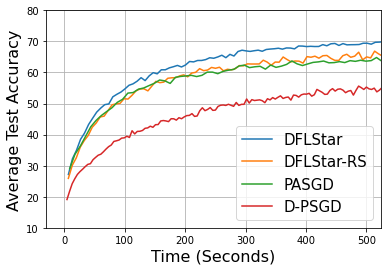

Accuracy for SDPS-cifar10-cnn-lastfc-alpha0.5 at 524 seconds is 75.34%
SDPS-cifar10-cnn-lastfc-alpha0.5 in grid reached 55% accuracy at 52.60 seconds, with communication cost of 21823.68, which corresponds to epoch 400.
Accuracy for SDPSrandom-cifar10-cnn-lastfc-alpha0.5 at 524 seconds is 73.54%
SDPSrandom-cifar10-cnn-lastfc-alpha0.5 in grid reached 55% accuracy at 65.50 seconds, with communication cost of 26810.85, which corresponds to epoch 500.
Accuracy for pasgd-cifar10-cnn-alpha0.5 at 524 seconds is 69.78%
pasgd-cifar10-cnn-alpha0.5 in grid reached 55% accuracy at 64.46 seconds, with communication cost of 72389.30, which corresponds to epoch 450.
Accuracy for dsgd-cifar10-cnn-alpha0.5 at 524 seconds is 60.00%
dsgd-cifar10-cnn-alpha0.5 in grid reached 55% accuracy at 282.00 seconds, with communication cost of 643460.45, which corresponds to epoch 4000.


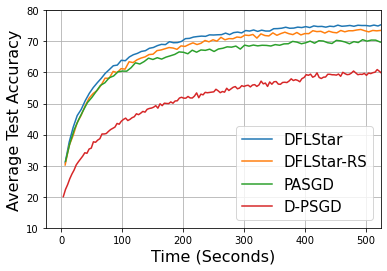

Accuracy for SDPS-cifar10-cnn-lastfc-alpha0.5 at 524 seconds is 75.10%
SDPS-cifar10-cnn-lastfc-alpha0.5 in clique-ring reached 55% accuracy at 46.81 seconds, with communication cost of 19150.41, which corresponds to epoch 350.
Accuracy for SDPSrandom-cifar10-cnn-lastfc-alpha0.5 at 524 seconds is 74.66%
SDPSrandom-cifar10-cnn-lastfc-alpha0.5 in clique-ring reached 55% accuracy at 59.29 seconds, with communication cost of 24129.77, which corresponds to epoch 450.
Accuracy for pasgd-cifar10-cnn-alpha0.5 at 524 seconds is 72.67%
pasgd-cifar10-cnn-alpha0.5 in clique-ring reached 55% accuracy at 61.34 seconds, with communication cost of 65686.59, which corresponds to epoch 350.
Accuracy for dsgd-cifar10-cnn-alpha0.5 at 524 seconds is 66.81%
dsgd-cifar10-cnn-alpha0.5 in clique-ring reached 55% accuracy at 159.56 seconds, with communication cost of 347200.53, which corresponds to epoch 1850.


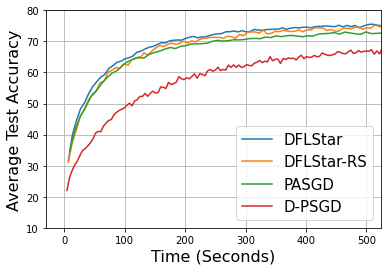

Accuracy for SDPS-cifar100-cnn-lastfc at 524 seconds is 41.63%
SDPS-cifar100-cnn-lastfc in grid did not reach the desired accuracy within the tested duration.
Accuracy for SDPSrandom-cifar100-cnn-lastfc at 524 seconds is 39.88%
SDPSrandom-cifar100-cnn-lastfc in grid did not reach the desired accuracy within the tested duration.
Accuracy for pasgd-cifar100-cnn-alpha0.2 at 524 seconds is 36.16%
pasgd-cifar100-cnn-alpha0.2 in grid did not reach the desired accuracy within the tested duration.
Accuracy for dsgd-cifar100-cnn-alpha0.2 at 524 seconds is 27.01%
dsgd-cifar100-cnn-alpha0.2 in grid did not reach the desired accuracy within the tested duration.


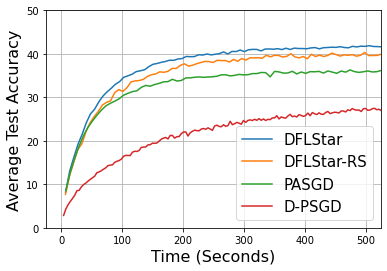

Accuracy for SDPS-cifar100-cnn-lastfc at 524 seconds is 41.11%
SDPS-cifar100-cnn-lastfc in clique-ring did not reach the desired accuracy within the tested duration.
Accuracy for SDPSrandom-cifar100-cnn-lastfc at 524 seconds is 38.86%
SDPSrandom-cifar100-cnn-lastfc in clique-ring did not reach the desired accuracy within the tested duration.
Accuracy for pasgd-cifar100-cnn-alpha0.2 at 524 seconds is 37.64%
pasgd-cifar100-cnn-alpha0.2 in clique-ring did not reach the desired accuracy within the tested duration.
Accuracy for dsgd-cifar100-cnn-alpha0.2 at 524 seconds is 31.25%
dsgd-cifar100-cnn-alpha0.2 in clique-ring did not reach the desired accuracy within the tested duration.


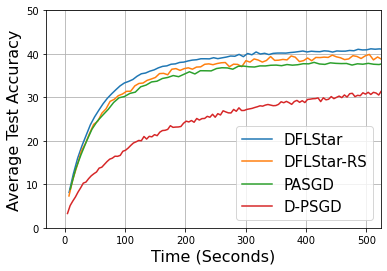

Accuracy for SDPS-cifar100-cnn-lastfc-alpha0.5 at 524 seconds is 43.99%
SDPS-cifar100-cnn-lastfc-alpha0.5 in grid did not reach the desired accuracy within the tested duration.
Accuracy for SDPSrandom-cifar100-cnn-lastfc-alpha0.5 at 524 seconds is 43.32%
SDPSrandom-cifar100-cnn-lastfc-alpha0.5 in grid did not reach the desired accuracy within the tested duration.
Accuracy for pasgd-cifar100-cnn-alpha0.5 at 524 seconds is 41.03%
pasgd-cifar100-cnn-alpha0.5 in grid did not reach the desired accuracy within the tested duration.
Accuracy for dsgd-cifar100-cnn-alpha0.5 at 524 seconds is 35.31%
dsgd-cifar100-cnn-alpha0.5 in grid did not reach the desired accuracy within the tested duration.


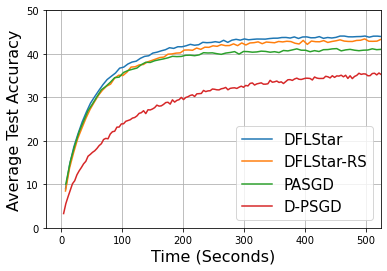

Accuracy for SDPS-cifar100-cnn-lastfc-alpha0.5 at 524 seconds is 43.01%
SDPS-cifar100-cnn-lastfc-alpha0.5 in clique-ring did not reach the desired accuracy within the tested duration.
Accuracy for SDPSrandom-cifar100-cnn-lastfc-alpha0.5 at 524 seconds is 42.21%
SDPSrandom-cifar100-cnn-lastfc-alpha0.5 in clique-ring did not reach the desired accuracy within the tested duration.
Accuracy for pasgd-cifar100-cnn-alpha0.5 at 524 seconds is 41.62%
pasgd-cifar100-cnn-alpha0.5 in clique-ring did not reach the desired accuracy within the tested duration.
Accuracy for dsgd-cifar100-cnn-alpha0.5 at 524 seconds is 38.61%
dsgd-cifar100-cnn-alpha0.5 in clique-ring did not reach the desired accuracy within the tested duration.


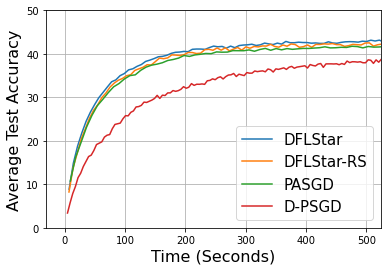

In [18]:
import os
import matplotlib.pyplot as plt

def generate_confidence_interval(ys, number_per_g = 30, number_of_g = 1000, low_percentile = 1, high_percentile = 99):
    means = []
    mins =[]
    maxs = []
    for i,y in enumerate(ys.T):
        y = bootstrapping(y, number_per_g, number_of_g)
        #print("y:", y)
        means.append(np.mean(y))
        mins.append(np.percentile(y, low_percentile))
        #print("mins:", mins)
        maxs.append(np.percentile(y, high_percentile))
        #print("maxs:", maxs)
    return np.array(means), np.array(mins), np.array(maxs)


def read_log_file(log_file_path):
    values = []
    with open(log_file_path, 'r') as file:
        for line in file:
            value = float(line.strip())
            values.append(value)
    return values

def get_configurations(alpha, dataset):
    config_options = {
        (0.2, 'cifar10'): ['SDPS-cifar10-cnn-lastfc', 'SDPSrandom-cifar10-cnn-lastfc', 'pasgd-cifar10-cnn-alpha0.2', 'dsgd-cifar10-cnn-alpha0.2'],
        (0.2, 'cifar100'): ['SDPS-cifar100-cnn-lastfc', 'SDPSrandom-cifar100-cnn-lastfc', 'pasgd-cifar100-cnn-alpha0.2', 'dsgd-cifar100-cnn-alpha0.2'],
        (0.5, 'cifar10'): ['SDPS-cifar10-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar10-cnn-lastfc-alpha0.5', 'pasgd-cifar10-cnn-alpha0.5', 'dsgd-cifar10-cnn-alpha0.5'],
        (0.5, 'cifar100'): ['SDPS-cifar100-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar100-cnn-lastfc-alpha0.5', 'pasgd-cifar100-cnn-alpha0.5', 'dsgd-cifar100-cnn-alpha0.5']
        # ... Add other configurations ...
        }
    return config_options.get((alpha, dataset), [])
    # Dictionary to hold configurations based on alpha and dataset


datasets = ['cifar10', 'cifar100']
alphas = [0.2, 0.5]
topologies = [('grid', 'grid'), ('clique-ring', 'roc')]  # (topology, topology_name)
#topologies = [('grid', 'grid')]

time_of_accuracy = 524
#time_of_accuracy = 408
time_to_accuracy = 55
size_byte_model = 3514152 
size_byte_selection = 204800

num_devices = 16
num_epochs = 8000
#topology = 'clique-ring'
#topology_name = 'roc'
#topology = 'grid'
noniid = 0.9
num_test_folders = 5  # Number of test folders



#total_time = 562  # total duration of the experiment in seconds
#time_per_epoch = total_time / 160 


#configurations = ['SDPS-cifar10-cnn-lastfc-alpha0.05','pasgd-cifar10-cnn-alpha0.05']


config_labels = {
    'all': 'PA-SGD',
    'all-cifar100-cnn': 'PA-SGD',
    'all-cifar10-cnn': 'PA-SGD',
    'all-distillation-cifar10-cnn': 'All Layers with Distillation',
    'cosine_similarity_weight-distillation': 'SDPS',
    'cosine_similarity_weight-distillation-cifar100-cnn':'SDPS',
    'cosine_similarity_weight-distillation-cifar10-cnn':'SDPS',
    'random-distillation': 'SDPS-RS',
    'random': 'PA-SGD-RS',
    'random-cifar100-cnn':'PA-SGD-RS',
    'random-cifar10-cnn':'PA-SGD-RS',
    'cosine_similarity_weight': 'Cosine Similarity Weight',
    'dsgd-cifar10-cnn': 'D-PSGD',
    'SDPS-cifar10-cnn-lastfc-0.1': 'DiSel',
    'pasgd-cifar10-cnn-alpha0.5': 'PASGD-alpha0.5',
    'SDPS-cifar10-cnn-lastfc-alpha0.5': 'DiSel-alpha0.5',
    'SDPS-cifar10-cnn-lastfc-alpha0.05': 'DiSel-alpha0.05',
    'dsgd-cifar10-cnn-alpha0.05': 'DSGD-alpha0.05',
    'SDPS-cifar100-cnn-lastfc-alpha0.05': 'DiSel-alpha0.05',
    'dsgd-cifar100-cnn-alpha0.05': 'DSGD-alpha0.05',
    'pasgd-cifar100-cnn-alpha0.05': 'paSGD-alpha0.05',
    'SDPS-cifar10-cnn-lastfc': 'DiSel',
    'SDPS-cifar10-cnn-lastfc-alpha0.05': 'DiSel',
    'SDPS-cifar10-cnn-lastfc-alpha0.5': 'DiSel',
    
}

# Define total time for each configuration
total_times = {
    'dsgd-cifar10-cnn': 562,  # Example time in seconds, add other configurations with their times
    'SDPS-cifar10-cnn-lastfc-0.1': 381,
    'pasgd-cifar10-cnn-alpha0.5': 572,
    'pasgd-cifar100-cnn-alpha0.05': 572,
    #'SDPS-cifar10-cnn-lastfc-alpha0.5': 381,
    'SDPS-cifar100-cnn-lastfc-alpha0.05': 762,
    'SDPS-cifar100-cnn-lastfc-alpha0.05': 762

}
epochs_dict = {
    'dsgd-cifar10-cnn': 8000,  # Example time in seconds, add other configurations with their times
    'SDPS-cifar10-cnn-lastfc-0.1': 2000,
    'pasgd-cifar10-cnn-alpha0.5': 4000,
    
}




for dataset in datasets:
    for alpha in alphas:
        configurations = get_configurations(alpha, dataset)

        for topology, topology_name in topologies:        
            for config in configurations:
                if 'pasgd' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 573
                        else:
                            total_times[config] = 701
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 719
                     
                    config_labels[config] = 'PASGD'
                elif 'dsgd' in config:
                    epochs_dict[config] = 8000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 564
                        else:
                            total_times[config] = 690
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 700
           
                    config_labels[config] = 'D-PSGD'
                elif 'SDPS' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 526
                        else:
                            total_times[config] = 535
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 546
                        else:
                            total_times[config] = 564
            
                    config_labels[config] = 'DFLStar'
                if 'SDPSrandom' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 524
                        else:
                            total_times[config] = 527
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 538
                        else:
                            total_times[config] = 546
                    config_labels[config] = 'DFLStar-RS'
                if 'noKD' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 408
                        else:
                            total_times[config] = 458
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 428
                        else:
                            total_times[config] = 491
                    config_labels[config] = 'DFLStar-NoKD'       
                
                all_tests_average_values = []

                total_time = total_times.get(config, 762)
                num_epochs = epochs_dict.get(config, 4000)

                for test_folder_num in range(1, num_test_folders + 1):
                    config_folder = f"KDD2024/pdsgd-noniid-test{test_folder_num}-{num_devices}C-{config}-{topology}-1sgd-{num_epochs}epochs"
                #config_folder = f"16_grid/pdsgd-noniid-test1-{num_devices}W-{topology}-1sgd-{num_epochs}epochs-{config}"
                    config_values = []

                    for device_num in range(num_devices):
                        log_file_path = os.path.join(config_folder, f"r{device_num}-testacc.log")
                        #log_file_path = os.path.join(config_folder, f"r0-testacc.log")
                        values = read_log_file(log_file_path)
                        config_values.append(values)

                        #numepochs = len(read_log_file(log_file_path))
                        #time_per_epoch = total_time / numepochs

                    # Compute average for each epoch for the current test folder
                    average_values = [sum(epoch_values) / num_devices for epoch_values in zip(*config_values)]

                    # Aggregate the averages from this test folder
                    if all_tests_average_values:
                        all_tests_average_values = [sum(x) for x in zip(all_tests_average_values, average_values)]
                    else:
                        all_tests_average_values = average_values

                # Compute the final average across all test folders
                final_average_values = [x / num_test_folders for x in all_tests_average_values]

                numepochs = len(final_average_values)
                time_per_epoch = total_time / numepochs

                times = [epoch * time_per_epoch for epoch in range(1, len(final_average_values) + 1)]

                epochs = list(range(1, len(final_average_values) + 1))
                plot_epochs = epochs[:2000:]
                #rounds = np.arange(1, num_epochs + 1)  
                #plt.plot(plot_epochs, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                if config == 'SDPS-cifar10-cnn-lastfc-0.1':
                    # Plot every 50 intervals for this specific configuration
                    plt.plot(times[::50], final_average_values[::50], label=config_labels.get(config, config))
                else:
                    # Plot normally for other configurations
                    plt.plot(times, final_average_values, label=config_labels.get(config, config))
                #plt.plot(times, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                #print(f"Accuracy for {config} is {final_average_values [-1]:.2f}")
                accuracy_at_time = np.interp(time_of_accuracy, times, final_average_values)
                print(f"Accuracy for {config} at {time_of_accuracy} seconds is {accuracy_at_time:.2f}%")

                time_acc = None
                for i, acc in enumerate(final_average_values):
                    if acc >= time_to_accuracy:
                        time_acc = times[i]           
                        break

                if time_acc is not None:
                    round_to_accuracy = int(time_acc / time_per_epoch)*50
                    #print("round to accuracy", round_to_accuracy )
                    #print("time_per_epoch", time_per_epoch )
                    if dataset == 'cifar10':
                        size_byte_selection = 20480
                        size_byte_model = 3514152
                    elif dataset == 'cifar100':
                        size_byte_selection = 204800
                        size_byte_model = 3698832
                    megabytes_value = traffic_cost(size_byte_model, config, topology_name, size_byte_selection, round_to_accuracy, num_devices)

                    print(f"{config} in {topology} reached {time_to_accuracy}% accuracy at {time_acc:.2f} seconds, with communication cost of {megabytes_value:.2f}, which corresponds to epoch {round_to_accuracy}.")


                else:
                    print(f"{config} in {topology} did not reach the desired accuracy within the tested duration.")

                    #    megabytes_value = traffic_cost(size_byte_model, config, size_byte_selection, 2000, num_devices)
                    #    print(f"{config} reached communication cost of {megabytes_value:.2f}, which corresponds to epoch 2000")
    
            plt.xlabel('Time (Seconds)', fontsize=16)
            plt.ylabel('Average Test Accuracy', fontsize=16)
            plt.xlim(right=524)
            #plt.xlim(right=408)
            if dataset == 'cifar10':
                plt.ylim(10,80)
            elif dataset == 'cifar100':
                plt.ylim(0,50)
            #plt.title('Average Test Accuracy Across Clients and Test Files')
            #plt.grid(True)
            plt.grid()
            fig = plt.gcf()
            #fig.set_size_inches(18.5, 10.5)
            plt.legend(fontsize=15)
            plt.savefig(f"accuracy-{dataset}-{topology_name}-alpha-{alpha}.pdf", bbox_inches='tight')
            plt.show()


round to accuracy 3100
408
6.575
Accuracy for SDPS-cifar10-cnn-lastfc at 408 seconds is 69.37  with communication cost of 169133.53 %
SDPS-cifar10-cnn-lastfc in grid reached 30% accuracy at 13.15 seconds, with communication cost of 5455.92, which corresponds to epoch 100.
round to accuracy 3100
408
6.55
Accuracy for SDPSrandom-cifar10-cnn-lastfc at 408 seconds is 66.92  with communication cost of 166227.28 %
SDPSrandom-cifar10-cnn-lastfc in grid reached 30% accuracy at 13.10 seconds, with communication cost of 5362.17, which corresponds to epoch 100.
round to accuracy 4000
408
5.1
Accuracy for SDPS-noKD-cifar10-cnn-lastfc at 408 seconds is 64.15  with communication cost of 218236.82 %
SDPS-noKD-cifar10-cnn-lastfc in grid reached 30% accuracy at 20.40 seconds, with communication cost of 10911.84, which corresponds to epoch 200.


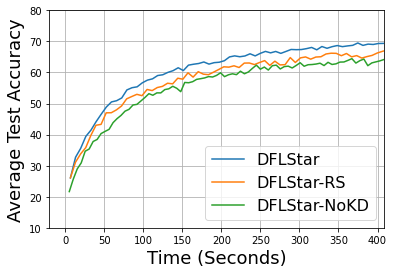

round to accuracy 2950
408
6.825
Accuracy for SDPS-cifar100-cnn-lastfc at 408 seconds is 41.32  with communication cost of 194153.36 %
SDPS-cifar100-cnn-lastfc in grid reached 30% accuracy at 68.25 seconds, with communication cost of 32907.35, which corresponds to epoch 500.
round to accuracy 3000
408
6.725
Accuracy for SDPSrandom-cifar100-cnn-lastfc at 408 seconds is 39.56  with communication cost of 169319.09 %
SDPSrandom-cifar100-cnn-lastfc in grid reached 30% accuracy at 87.42 seconds, with communication cost of 36685.80, which corresponds to epoch 650.
round to accuracy 3800
408
5.35
Accuracy for SDPS-noKD-cifar100-cnn-lastfc at 408 seconds is 36.16  with communication cost of 250095.85 %
SDPS-noKD-cifar100-cnn-lastfc in grid reached 30% accuracy at 96.30 seconds, with communication cost of 59233.23, which corresponds to epoch 900.


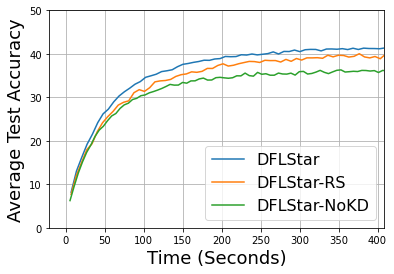

In [19]:
import os
import matplotlib.pyplot as plt

def generate_confidence_interval(ys, number_per_g = 30, number_of_g = 1000, low_percentile = 1, high_percentile = 99):
    means = []
    mins =[]
    maxs = []
    for i,y in enumerate(ys.T):
        y = bootstrapping(y, number_per_g, number_of_g)
        #print("y:", y)
        means.append(np.mean(y))
        mins.append(np.percentile(y, low_percentile))
        #print("mins:", mins)
        maxs.append(np.percentile(y, high_percentile))
        #print("maxs:", maxs)
    return np.array(means), np.array(mins), np.array(maxs)


def read_log_file(log_file_path):
    values = []
    with open(log_file_path, 'r') as file:
        for line in file:
            value = float(line.strip())
            values.append(value)
    return values

def get_configurations(alpha, dataset):
    config_options = {
#        (0.2, 'cifar10'): ['SDPS-cifar10-cnn-lastfc', 'SDPSrandom-cifar10-cnn-lastfc', 'pasgd-cifar10-cnn-alpha0.2', 'dsgd-cifar10-cnn-alpha0.2'],
#        (0.2, 'cifar100'): ['SDPS-cifar100-cnn-lastfc', 'SDPSrandom-cifar100-cnn-lastfc', 'pasgd-cifar100-cnn-alpha0.2', 'dsgd-cifar100-cnn-alpha0.2'],
#        (0.5, 'cifar10'): ['SDPS-cifar10-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar10-cnn-lastfc-alpha0.5', 'pasgd-cifar10-cnn-alpha0.5', 'dsgd-cifar10-cnn-alpha0.5'],
#        (0.5, 'cifar100'): ['SDPS-cifar100-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar100-cnn-lastfc-alpha0.5', 'pasgd-cifar100-cnn-alpha0.5', 'dsgd-cifar100-cnn-alpha0.5']
        # ... Add other configurations ...
        
        (0.2, 'cifar10'): ['SDPS-cifar10-cnn-lastfc', 'SDPSrandom-cifar10-cnn-lastfc', 'SDPS-noKD-cifar10-cnn-lastfc'],
        (0.2, 'cifar100'): ['SDPS-cifar100-cnn-lastfc', 'SDPSrandom-cifar100-cnn-lastfc', 'SDPS-noKD-cifar100-cnn-lastfc']
        }
    return config_options.get((alpha, dataset), [])
    # Dictionary to hold configurations based on alpha and dataset


datasets = ['cifar10', 'cifar100']
alphas = [0.2]
#topologies = [('grid', 'grid'), ('clique-ring', 'roc')]  # (topology, topology_name)
topologies = [('grid', 'grid')]

time_of_accuracy = 408
time_to_accuracy = 30
size_byte_model = 3514152 
size_byte_selection = 204800

num_devices = 16
num_epochs = 8000
#topology = 'clique-ring'
#topology_name = 'roc'
#topology = 'grid'
noniid = 0.9
num_test_folders = 5  # Number of test folders



for dataset in datasets:
    for alpha in alphas:
        configurations = get_configurations(alpha, dataset)

        for topology, topology_name in topologies:        
            for config in configurations:
                if 'pasgd' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 573
                        else:
                            total_times[config] = 701
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 719
                     
                    config_labels[config] = 'PASGD'
                elif 'dsgd' in config:
                    epochs_dict[config] = 8000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 564
                        else:
                            total_times[config] = 690
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 700
           
                    config_labels[config] = 'DSGD'
                elif 'SDPS' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 526
                        else:
                            total_times[config] = 535
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 546
                        else:
                            total_times[config] = 564
            
                    config_labels[config] = 'DFLStar'
                if 'SDPSrandom' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 524
                        else:
                            total_times[config] = 527
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 538
                        else:
                            total_times[config] = 546
                    config_labels[config] = 'DFLStar-RS'
                if 'noKD' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 408
                        else:
                            total_times[config] = 458
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 428
                        else:
                            total_times[config] = 491
                    config_labels[config] = 'DFLStar-NoKD'       
                
                all_tests_average_values = []

                total_time = total_times.get(config, 762)
                num_epochs = epochs_dict.get(config, 4000)

                for test_folder_num in range(1, num_test_folders + 1):
                    config_folder = f"KDD2024/pdsgd-noniid-test{test_folder_num}-{num_devices}C-{config}-{topology}-1sgd-{num_epochs}epochs"
                #config_folder = f"16_grid/pdsgd-noniid-test1-{num_devices}W-{topology}-1sgd-{num_epochs}epochs-{config}"
                    config_values = []

                    for device_num in range(num_devices):
                        log_file_path = os.path.join(config_folder, f"r{device_num}-testacc.log")
                        #log_file_path = os.path.join(config_folder, f"r0-testacc.log")
                        values = read_log_file(log_file_path)
                        config_values.append(values)

                        #numepochs = len(read_log_file(log_file_path))
                        #time_per_epoch = total_time / numepochs

                    # Compute average for each epoch for the current test folder
                    average_values = [sum(epoch_values) / num_devices for epoch_values in zip(*config_values)]

                    # Aggregate the averages from this test folder
                    if all_tests_average_values:
                        all_tests_average_values = [sum(x) for x in zip(all_tests_average_values, average_values)]
                    else:
                        all_tests_average_values = average_values

                # Compute the final average across all test folders
                final_average_values = [x / num_test_folders for x in all_tests_average_values]

                numepochs = len(final_average_values)
                time_per_epoch = total_time / numepochs

                times = [epoch * time_per_epoch for epoch in range(1, len(final_average_values) + 1)]

                epochs = list(range(1, len(final_average_values) + 1))
                plot_epochs = epochs[:2000:]
                #rounds = np.arange(1, num_epochs + 1)  
                #plt.plot(plot_epochs, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                if config == 'SDPS-cifar10-cnn-lastfc-0.1':
                    # Plot every 50 intervals for this specific configuration
                    plt.plot(times[::50], final_average_values[::50], label=config_labels.get(config, config))
                else:
                    # Plot normally for other configurations
                    plt.plot(times, final_average_values, label=config_labels.get(config, config))
                #plt.plot(times, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                #print(f"Accuracy for {config} is {final_average_values [-1]:.2f}")
                accuracy_at_time = np.interp(time_of_accuracy, times, final_average_values)
                if dataset == 'cifar10':
                        size_byte_selection = 20480
                        size_byte_model = 3514152
                elif dataset == 'cifar100':
                        size_byte_selection = 204800
                        size_byte_model = 3698832
                round_to_accuracy = int(time_of_accuracy / time_per_epoch)*50
                print("round to accuracy", round_to_accuracy)
                print(time_of_accuracy)
                print(time_per_epoch)
                megabytes_value = traffic_cost(size_byte_model, config, topology_name, size_byte_selection, round_to_accuracy, num_devices)
                print(f"Accuracy for {config} at {time_of_accuracy} seconds is {accuracy_at_time:.2f}  with communication cost of {megabytes_value:.2f} %")

                time_acc = None
                for i, acc in enumerate(final_average_values):
                    if acc >= time_to_accuracy:
                        time_acc = times[i]           
                        break

                if time_acc is not None:
                    round_to_accuracy = int(time_acc / time_per_epoch)*50
                    if dataset == 'cifar10':
                        size_byte_selection = 20480
                        size_byte_model = 3514152
                    elif dataset == 'cifar100':
                        size_byte_selection = 204800
                        size_byte_model = 3698832
                    
                    megabytes_value = traffic_cost(size_byte_model, config, topology_name, size_byte_selection, round_to_accuracy, num_devices)

                    print(f"{config} in {topology} reached {time_to_accuracy}% accuracy at {time_acc:.2f} seconds, with communication cost of {megabytes_value:.2f}, which corresponds to epoch {round_to_accuracy}.")


                else:
                    print(f"{config} in {topology} did not reach the desired accuracy within the tested duration.")

                    #    megabytes_value = traffic_cost(size_byte_model, config, size_byte_selection, 2000, num_devices)
                    #    print(f"{config} reached communication cost of {megabytes_value:.2f}, which corresponds to epoch 2000")
    
            plt.xlabel('Time (Seconds)', fontsize=18)
            plt.ylabel('Average Test Accuracy', fontsize=18)
            plt.xlim(right=408)
            if dataset == 'cifar10':
                plt.ylim(10,80)
            elif dataset == 'cifar100':
                plt.ylim(0,50)
            #plt.title('Average Test Accuracy Across Clients and Test Files')
            #plt.grid(True)
            plt.grid()
            fig = plt.gcf()
            #fig.set_size_inches(18.5, 10.5)
            plt.legend(fontsize=16)
            plt.savefig(f"ablation-{dataset}-{topology_name}-alpha-{alpha}.pdf", bbox_inches='tight')
            plt.show()


hi
Accuracy for pasgd-cifar10-cnn-alpha0.2 at 486 seconds is 59.99%
hi
Accuracy for pasgdrandom-cifar10-cnn-alpha0.2 at 486 seconds is 59.57%
hi
Accuracy for pasgd-cifar10-cnn-IID at 486 seconds is 77.02%
hi
Accuracy for pasgdrandom-cifar10-cnn-IID at 486 seconds is 77.17%


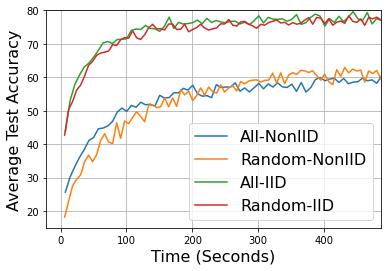

In [20]:
import os
import matplotlib.pyplot as plt

def generate_confidence_interval(ys, number_per_g = 30, number_of_g = 1000, low_percentile = 1, high_percentile = 99):
    means = []
    mins =[]
    maxs = []
    for i,y in enumerate(ys.T):
        y = bootstrapping(y, number_per_g, number_of_g)
        #print("y:", y)
        means.append(np.mean(y))
        mins.append(np.percentile(y, low_percentile))
        #print("mins:", mins)
        maxs.append(np.percentile(y, high_percentile))
        #print("maxs:", maxs)
    return np.array(means), np.array(mins), np.array(maxs)


def read_log_file(log_file_path):
    values = []
    with open(log_file_path, 'r') as file:
        for line in file:
            value = float(line.strip())
            values.append(value)
    return values

def get_configurations(alpha, dataset):
    # Dictionary to hold configurations based on alpha and dataset
    config_options = {
        #(0.2, 'cifar10'): ['SDPS-cifar10-cnn-lastfc', 'SDPS-noKD-cifar10-cnn-lastfc'],
        #(0.2, 'cifar100'): ['SDPS-cifar100-cnn-lastfc', 'SDPS-noKD-cifar10-cnn-lastfc'],
        (0.2, 'cifar10'): ['pasgd-cifar10-cnn-alpha0.2', 'pasgdrandom-cifar10-cnn-alpha0.2', 'pasgd-cifar10-cnn-IID','pasgdrandom-cifar10-cnn-IID'],
        (0.2, 'cifar100'): ['pasgd-cifar100-cnn-motivation', 'pasgdrandom-cifar100-cnn-motivation', 'pasgd-cifar100-cnn-IID','pasgdrandom-cifar100-cnn-IID']
#         (0.5, 'cifar10'): ['SDPS-cifar10-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar10-cnn-lastfc-alpha0.5', 'pasgd-cifar10-cnn-alpha0.5', 'dsgd-cifar10-cnn-alpha0.5'],
#         (0.5, 'cifar100'): ['SDPS-cifar100-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar100-cnn-lastfc-alpha0.5', 'pasgd-cifar100-cnn-alpha0.5', 'dsgd-cifar100-cnn-alpha0.5'],
#         (0.05, 'cifar10'): ['SDPS-cifar10-cnn-lastfc-alpha0.05', 'SDPSrandom-cifar10-cnn-lastfc-alpha0.05', 'pasgd-cifar10-cnn-alpha0.05'],
#         (0.05, 'cifar100'): ['SDPS-cifar100-cnn-lastfc-alpha0.05', 'SDPSrandom-cifar100-cnn-lastfc-alpha0.05', 'pasgd-cifar100-cnn-alpha0.05'],
        
        
        # ... Add other configurations ...
    }
    return config_options.get((alpha, dataset), [])

datasets = ['cifar10']
alphas = [0.2]
#topologies = [('grid', 'grid'), ('clique-ring', 'roc')]  # (topology, topology_name)
topologies = [('grid', 'grid')]


time_of_accuracy = 486
time_to_accuracy = 70
size_byte_model = 3514152 
size_byte_selection = 204800

num_devices = 16
num_epochs = 8000
#topology = 'clique-ring'
#topology_name = 'roc'
#topology = 'grid'
noniid = 0.9
num_test_folders = 1  # Number of test folders



#total_time = 562  # total duration of the experiment in seconds
#time_per_epoch = total_time / 160 


#configurations = ['SDPS-cifar10-cnn-lastfc-alpha0.05','pasgd-cifar10-cnn-alpha0.05']



communication_costs = {}

for dataset in datasets:
    for alpha in alphas:
        configurations = get_configurations(alpha, dataset)

        for topology, topology_name in topologies:        
            for config in configurations:
                if 'pasgd' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 573
                            #total_times[config] = 486
                            print("hi")
                        else:
                            total_times[config] = 701
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 719
                            
                    if 'IID' in config: 
                        config_labels[config] = 'All-IID'
                    else:
                        config_labels[config] = 'All-NonIID'
                     
                    #config_labels[config] = 'PASGD'
                elif 'dsgd' in config:
                    epochs_dict[config] = 8000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 564
                        else:
                            total_times[config] = 690
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 700
           
                    config_labels[config] = 'DSGD'
                elif 'SDPS' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 526
                        else:
                            total_times[config] = 535
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 546
                        else:
                            total_times[config] = 564
            
                    config_labels[config] = 'FedStar'
                if 'SDPSrandom' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 524
                        else:
                            total_times[config] = 527
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 538
                        else:
                            total_times[config] = 546
                    config_labels[config] = 'FedStar-RS'
                if 'noKD' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 408
                        else:
                            total_times[config] = 458
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 428
                        else:
                            total_times[config] = 491
                    config_labels[config] = 'FedStar-NoKD'
                if 'pasgdrandom' in config:
                    if 'IID' in config:
                        config_labels[config] = 'Random-IID'
                    else:
                        config_labels[config] = 'Random-NonIID'
                    
                    if dataset == 'cifar10':
                        total_times[config] = 486
                    else:
                        total_times[config] = 491
              

                all_tests_average_values = []
               
                total_time = total_times.get(config, 574)
                num_epochs = epochs_dict.get(config, 4000)

                for test_folder_num in range(1, num_test_folders + 1):
                    config_folder = f"KDD2024/pdsgd-noniid-test{test_folder_num}-{num_devices}C-{config}-{topology}-1sgd-{num_epochs}epochs"
                #config_folder = f"16_grid/pdsgd-noniid-test1-{num_devices}W-{topology}-1sgd-{num_epochs}epochs-{config}"
                    config_values = []

                    for device_num in range(num_devices):
                        log_file_path = os.path.join(config_folder, f"r{device_num}-testacc.log")
                        #log_file_path = os.path.join(config_folder, f"r0-testacc.log")
                        values = read_log_file(log_file_path)
                        config_values.append(values)

                        #numepochs = len(read_log_file(log_file_path))
                        #time_per_epoch = total_time / numepochs

                    # Compute average for each epoch for the current test folder
                    average_values = [sum(epoch_values) / num_devices for epoch_values in zip(*config_values)]

                    # Aggregate the averages from this test folder
                    if all_tests_average_values:
                        all_tests_average_values = [sum(x) for x in zip(all_tests_average_values, average_values)]
                    else:
                        all_tests_average_values = average_values

                # Compute the final average across all test folders
                final_average_values = [x / num_test_folders for x in all_tests_average_values]

                numepochs = len(final_average_values)
                time_per_epoch = total_time / numepochs

                times = [epoch * time_per_epoch for epoch in range(1, len(final_average_values) + 1)]

                epochs = list(range(1, len(final_average_values) + 1))
                plot_epochs = epochs[:2000:]
                #rounds = np.arange(1, num_epochs + 1)  
                #plt.plot(plot_epochs, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                if config == 'SDPS-cifar10-cnn-lastfc-0.1':
                    # Plot every 50 intervals for this specific configuration
                    plt.plot(times[::50], final_average_values[::50], label=config_labels.get(config, config))
                else:
                    # Plot normally for other configurations
                    plt.plot(times, final_average_values, label=config_labels.get(config, config))
                #plt.plot(times, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                #print(f"Accuracy for {config} is {final_average_values [-1]:.2f}")
                accuracy_at_time = np.interp(time_of_accuracy, times, final_average_values)
                print(f"Accuracy for {config} at {time_of_accuracy} seconds is {accuracy_at_time:.2f}%")

                time_acc = None
                for i, acc in enumerate(final_average_values):
                    if acc >= time_to_accuracy:
                        time_acc = times[i]           
                        break

            
            
            
            plt.xlabel('Time (Seconds)', fontsize=16)
            plt.ylabel('Average Test Accuracy', fontsize=16)
            plt.xlim(right=486)
            if dataset == 'cifar10':
                plt.ylim(15,80)
            elif dataset == 'cifar100':
                plt.ylim(0,50)
            #plt.title('Average Test Accuracy Across Clients and Test Files')
            #plt.grid(True)
            plt.grid()
            fig = plt.gcf()
            #fig.set_size_inches(18.5, 10.5)
            plt.legend(fontsize=16)
            plt.savefig(f"motivation-ps-cifar10.pdf", bbox_inches='tight')
            plt.show()


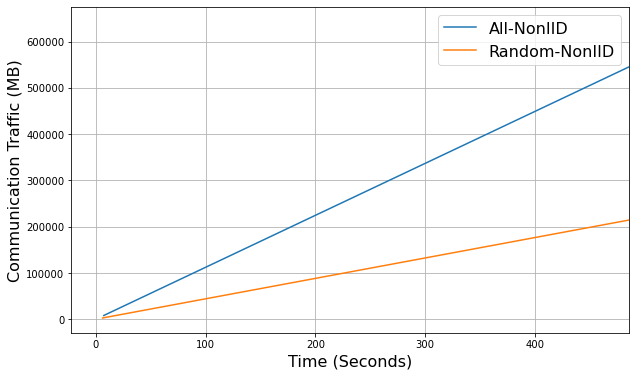

In [21]:
import os
import matplotlib.pyplot as plt

def generate_confidence_interval(ys, number_per_g = 30, number_of_g = 1000, low_percentile = 1, high_percentile = 99):
    means = []
    mins =[]
    maxs = []
    for i,y in enumerate(ys.T):
        y = bootstrapping(y, number_per_g, number_of_g)
        #print("y:", y)
        means.append(np.mean(y))
        mins.append(np.percentile(y, low_percentile))
        #print("mins:", mins)
        maxs.append(np.percentile(y, high_percentile))
        #print("maxs:", maxs)
    return np.array(means), np.array(mins), np.array(maxs)


def read_log_file(log_file_path):
    values = []
    with open(log_file_path, 'r') as file:
        for line in file:
            value = float(line.strip())
            values.append(value)
    return values

def get_configurations(alpha, dataset):
    # Dictionary to hold configurations based on alpha and dataset
    config_options = {
        #(0.2, 'cifar10'): ['SDPS-cifar10-cnn-lastfc', 'SDPS-noKD-cifar10-cnn-lastfc'],
        #(0.2, 'cifar100'): ['SDPS-cifar100-cnn-lastfc', 'SDPS-noKD-cifar10-cnn-lastfc'],
        (0.2, 'cifar10'): ['pasgd-cifar10-cnn-alpha0.2', 'pasgdrandom-cifar10-cnn-alpha0.2'],
        (0.2, 'cifar100'): ['pasgd-cifar100-cnn-motivation', 'pasgdrandom-cifar100-cnn-motivation', 'pasgd-cifar100-cnn-IID','pasgdrandom-cifar100-cnn-IID']
#         (0.5, 'cifar10'): ['SDPS-cifar10-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar10-cnn-lastfc-alpha0.5', 'pasgd-cifar10-cnn-alpha0.5', 'dsgd-cifar10-cnn-alpha0.5'],
#         (0.5, 'cifar100'): ['SDPS-cifar100-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar100-cnn-lastfc-alpha0.5', 'pasgd-cifar100-cnn-alpha0.5', 'dsgd-cifar100-cnn-alpha0.5'],
#         (0.05, 'cifar10'): ['SDPS-cifar10-cnn-lastfc-alpha0.05', 'SDPSrandom-cifar10-cnn-lastfc-alpha0.05', 'pasgd-cifar10-cnn-alpha0.05'],
#         (0.05, 'cifar100'): ['SDPS-cifar100-cnn-lastfc-alpha0.05', 'SDPSrandom-cifar100-cnn-lastfc-alpha0.05', 'pasgd-cifar100-cnn-alpha0.05'],
        
        
        # ... Add other configurations ...
    }
    return config_options.get((alpha, dataset), [])

datasets = ['cifar10']
alphas = [0.2]
#topologies = [('grid', 'grid'), ('clique-ring', 'roc')]  # (topology, topology_name)
topologies = [('grid', 'grid')]


time_of_accuracy = 486
time_to_accuracy = 70
size_byte_model = 3514152 
#size_byte_selection = 204800

num_devices = 16
num_epochs = 8000
#topology = 'clique-ring'
#topology_name = 'roc'
#topology = 'grid'
noniid = 0.9
num_test_folders = 1  # Number of test folders



#total_time = 562  # total duration of the experiment in seconds
#time_per_epoch = total_time / 160 


#configurations = ['SDPS-cifar10-cnn-lastfc-alpha0.05','pasgd-cifar10-cnn-alpha0.05']


communication_costs = {}

for dataset in datasets:
    for alpha in alphas:
        configurations = get_configurations(alpha, dataset)
        traffic_data = {config: [] for config in configurations}
        for topology, topology_name in topologies:        
            for config in configurations:
                if 'pasgd' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 573
                        else:
                            total_times[config] = 701
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 719
                            
                    if 'IID' in config: 
                        config_labels[config] = 'All-IID'
                    else:
                        config_labels[config] = 'All-NonIID'
                     
                    #config_labels[config] = 'PASGD'
                elif 'dsgd' in config:
                    epochs_dict[config] = 8000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 564
                        else:
                            total_times[config] = 690
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 700
           
                    config_labels[config] = 'DSGD'
                elif 'SDPS' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 526
                        else:
                            total_times[config] = 535
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 546
                        else:
                            total_times[config] = 564
            
                    config_labels[config] = 'FedStar'
                if 'SDPSrandom' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 524
                        else:
                            total_times[config] = 527
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 538
                        else:
                            total_times[config] = 546
                    config_labels[config] = 'FedStar-RS'
                if 'noKD' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 408
                        else:
                            total_times[config] = 458
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 428
                        else:
                            total_times[config] = 491
                    config_labels[config] = 'FedStar-NoKD'
                if 'pasgdrandom' in config:
                    if 'IID' in config:
                        config_labels[config] = 'Random-IID'
                    else:
                        config_labels[config] = 'Random-NonIID'
                    
                    if dataset == 'cifar10':
                        total_times[config] = 486
                    else:
                        total_times[config] = 491

                all_tests_average_values = []
               
                total_time = total_times.get(config, 574)
                num_epochs = epochs_dict.get(config, 4000)

                for test_folder_num in range(1, num_test_folders + 1):
                    config_folder = f"KDD2024/pdsgd-noniid-test{test_folder_num}-{num_devices}C-{config}-{topology}-1sgd-{num_epochs}epochs"
                #config_folder = f"16_grid/pdsgd-noniid-test1-{num_devices}W-{topology}-1sgd-{num_epochs}epochs-{config}"
                    config_values = []

                    for device_num in range(num_devices):
                        log_file_path = os.path.join(config_folder, f"r{device_num}-testacc.log")
                        #log_file_path = os.path.join(config_folder, f"r0-testacc.log")
                        values = read_log_file(log_file_path)
                        config_values.append(values)

                        #numepochs = len(read_log_file(log_file_path))
                        #time_per_epoch = total_time / numepochs

                    # Compute average for each epoch for the current test folder
                    average_values = [sum(epoch_values) / num_devices for epoch_values in zip(*config_values)]

                    # Aggregate the averages from this test folder
                    if all_tests_average_values:
                        all_tests_average_values = [sum(x) for x in zip(all_tests_average_values, average_values)]
                    else:
                        all_tests_average_values = average_values

                # Compute the final average across all test folders
                final_average_values = [x / num_test_folders for x in all_tests_average_values]

                numepochs = len(final_average_values)
                time_per_epoch = total_time / numepochs
                
                                # Calculate traffic for each epoch
                if dataset == 'cifar10':
                        size_byte_selection = 20480
                        size_byte_model = 3514152
                elif dataset == 'cifar100':
                        size_byte_selection = 204800
                        size_byte_model = 3698832

                for epoch in range(1, numepochs + 1):
                        time_at_epoch = epoch * time_per_epoch
                        #print(config)
                        megabytes_value = traffic_cost(size_byte_model, config, topology_name, size_byte_selection, epoch*50, num_devices)
                        traffic_data[config].append((time_at_epoch, megabytes_value))

            # Plot traffic versus time for each configuration
            plt.figure(figsize=(10, 6))
            for config, data in traffic_data.items():
                times, traffic = zip(*data)
                plt.plot(times, traffic, label=config_labels.get(config, config))

            
            
            plt.xlabel('Time (Seconds)', fontsize = 16)
            plt.ylabel('Communication Traffic (MB)', fontsize = 16)
            plt.xlim(right=486)
#             if dataset == 'cifar10':
#                 plt.ylim(15,80)
#             elif dataset == 'cifar100':
#                 plt.ylim(0,50)
            #plt.title('Average Test Accuracy Across Clients and Test Files')
            #plt.grid(True)
            plt.grid()
            fig = plt.gcf()
            #fig.set_size_inches(18.5, 10.5)
            plt.legend(fontsize = 16)
            plt.savefig(f"traffic-motivation-cifar10.pdf", bbox_inches='tight')
            plt.show()


Accuracy for motivation-local-cifar10-cnn at 562 seconds is 37.75%
motivation-local-cifar10-cnn did not reach the desired accuracy within the tested duration.
Accuracy for motivation-global-cifar10-cnn at 562 seconds is 54.62%
motivation-global-cifar10-cnn did not reach the desired accuracy within the tested duration.


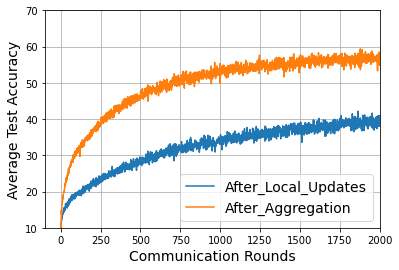

In [22]:
import os
import matplotlib.pyplot as plt

def generate_confidence_interval(ys, number_per_g = 30, number_of_g = 1000, low_percentile = 1, high_percentile = 99):
    means = []
    mins =[]
    maxs = []
    for i,y in enumerate(ys.T):
        y = bootstrapping(y, number_per_g, number_of_g)
        #print("y:", y)
        means.append(np.mean(y))
        mins.append(np.percentile(y, low_percentile))
        #print("mins:", mins)
        maxs.append(np.percentile(y, high_percentile))
        #print("maxs:", maxs)
    return np.array(means), np.array(mins), np.array(maxs)


def read_log_file(log_file_path):
    values = []
    with open(log_file_path, 'r') as file:
        for line in file:
            value = float(line.strip())
            values.append(value)
    return values

def get_configurations(alpha, dataset):
    # Dictionary to hold configurations based on alpha and dataset
    config_options = {
        (0.2, 'cifar10'): ['motivation-local-cifar10-cnn', 'motivation-global-cifar10-cnn'],
      
        (0.2, 'cifar100'): ['SDPS-cifar100-cnn-lastfc', 'SDPSrandom-cifar100-cnn-lastfc'],
        (0.5, 'cifar10'): ['SDPS-cifar10-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar10-cnn-lastfc-alpha0.5'],
        (0.5, 'cifar100'): ['SDPS-cifar100-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar100-cnn-lastfc-alpha0.5'],
        # ... Add other configurations ...
    }
    return config_options.get((alpha, dataset), [])

datasets = ['cifar10']
alphas = [0.2]
#topologies = [('grid', 'grid'), ('clique-ring', 'roc')]  # (topology, topology_name)
topologies = [('grid', 'grid')]
#topologies = [('clique-ring', 'roc')]



time_of_accuracy = 562
time_to_accuracy = 70
size_byte_model = 3514152 
size_byte_selection = 204800

num_devices = 16
num_epochs = 8000
#topology = 'clique-ring'
#topology_name = 'roc'
#topology = 'grid'
noniid = 0.9
num_test_folders = 1  # Number of test folders



#total_time = 562  # total duration of the experiment in seconds
#time_per_epoch = total_time / 160 


#configurations = ['SDPS-cifar10-cnn-lastfc-alpha0.05','pasgd-cifar10-cnn-alpha0.05']





for dataset in datasets:
    for alpha in alphas:
        configurations = get_configurations(alpha, dataset)

        for topology, topology_name in topologies:        
            for config in configurations:
                if 'pasgd' in config:
                    epochs_dict[config] = 4000
                    total_times[config] = 572
                    config_labels[config] = 'PASGD'
                elif 'dsgd' in config:
                    epochs_dict[config] = 8000
                    total_times[config] = 562
                    config_labels[config] = 'DSGD'
                elif 'SDPS' in config:
                    epochs_dict[config] = 4000
                    total_times[config] = 765
                    config_labels[config] = 'DiSel'
                if 'SDPSrandom' in config:
                    config_labels[config] = 'DiSel-RS'
                    total_times[config] = 755
                if 'motivation-local' in config:
                    config_labels[config] = 'After_Local_Updates'
                if 'motivation-global' in config:
                    config_labels[config] = 'After_Aggregation'
                all_tests_average_values = []

                total_time = total_times.get(config, 762)
                num_epochs = epochs_dict.get(config, 2000)

                for test_folder_num in range(1, num_test_folders + 1):
                    config_folder = f"KDD2024/pdsgd-noniid-test{test_folder_num}-{num_devices}C-{config}-{topology}-1sgd-{num_epochs}epochs"
                #config_folder = f"16_grid/pdsgd-noniid-test1-{num_devices}W-{topology}-1sgd-{num_epochs}epochs-{config}"
                    config_values = []

                    for device_num in range(num_devices):
                        log_file_path = os.path.join(config_folder, f"r{device_num}-testacc.log")
                        #log_file_path = os.path.join(config_folder, f"r0-testacc.log")
                        values = read_log_file(log_file_path)
                        config_values.append(values)

                        #numepochs = len(read_log_file(log_file_path))
                        #time_per_epoch = total_time / numepochs

                    # Compute average for each epoch for the current test folder
                    average_values = [sum(epoch_values) / num_devices for epoch_values in zip(*config_values)]

                    # Aggregate the averages from this test folder
                    if all_tests_average_values:
                        all_tests_average_values = [sum(x) for x in zip(all_tests_average_values, average_values)]
                    else:
                        all_tests_average_values = average_values

                # Compute the final average across all test folders
                final_average_values = [x / num_test_folders for x in all_tests_average_values]

                numepochs = len(final_average_values)
                time_per_epoch = total_time / numepochs

                times = [epoch * time_per_epoch for epoch in range(1, len(final_average_values) + 1)]

                epochs = list(range(1, len(final_average_values) + 1))
                plot_epochs = epochs[:2000:]
                #rounds = np.arange(1, num_epochs + 1)  
                #plt.plot(plot_epochs, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                if config == 'SDPS-cifar10-cnn-lastfc-0.1':
                    # Plot every 50 intervals for this specific configuration
                    plt.plot(times[::50], final_average_values[::50], label=config_labels.get(config, config))
                else:
                    # Plot normally for other configurations
                    plt.plot(plot_epochs, final_average_values, label=config_labels.get(config, config))
                #plt.plot(times, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                #print(f"Accuracy for {config} is {final_average_values [-1]:.2f}")
                accuracy_at_time = np.interp(time_of_accuracy, times, final_average_values)
                print(f"Accuracy for {config} at {time_of_accuracy} seconds is {accuracy_at_time:.2f}%")

                time_acc = None
                for i, acc in enumerate(final_average_values):
                    if acc >= time_to_accuracy:
                        time_acc = times[i]           
                        break

                if time_acc is not None:
                    round_to_accuracy = int(time_acc / time_per_epoch)*50
                    megabytes_value = traffic_cost(size_byte_model, config, topology_name, size_byte_selection, round_to_accuracy, num_devices)

                    print(f"{config} reached {time_to_accuracy}% accuracy at {time_acc:.2f} seconds, with communication cost of {megabytes_value:.2f}, which corresponds to epoch {round_to_accuracy}.")


                else:
                    print(f"{config} did not reach the desired accuracy within the tested duration.")

                    #    megabytes_value = traffic_cost(size_byte_model, config, size_byte_selection, 2000, num_devices)
                    #    print(f"{config} reached communication cost of {megabytes_value:.2f}, which corresponds to epoch 2000")
    
            plt.xlabel('Communication Rounds', fontsize = 14)
            plt.ylabel('Average Test Accuracy', fontsize = 14)
            plt.xlim(right=2000)
            if dataset == 'cifar10':
                plt.ylim(10,70)
            elif dataset == 'cifar100':
                plt.ylim(0,50)
            #plt.title('Average Test Accuracy Across Clients and Test Files')
            #plt.grid(True)
            plt.grid()
            fig = plt.gcf()
            #fig.set_size_inches(18.5, 10.5)
            plt.legend(fontsize = 14)
            plt.savefig(f"kd-motivation.pdf", bbox_inches='tight')
            plt.show()


Accuracy for SDPS-cifar10-cnn-lastfc at 562 seconds is 69.41%
SDPS-cifar10-cnn-lastfc reached 55% accuracy at 85.48 seconds, with communication cost of 35463.48, which corresponds to epoch 650.
Accuracy for SDPSrandom-cifar10-cnn-lastfc at 562 seconds is 66.45%
SDPSrandom-cifar10-cnn-lastfc reached 55% accuracy at 117.90 seconds, with communication cost of 48259.53, which corresponds to epoch 900.
Accuracy for SDPS-noKD-cifar10-cnn-lastfc at 562 seconds is 64.15%
SDPS-noKD-cifar10-cnn-lastfc reached 55% accuracy at 137.70 seconds, with communication cost of 73654.93, which corresponds to epoch 1350.


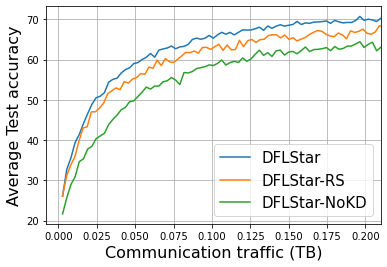

Accuracy for SDPS-cifar100-cnn-lastfc at 562 seconds is 41.69%
SDPS-cifar100-cnn-lastfc did not reach the desired accuracy within the tested duration.
Accuracy for SDPSrandom-cifar100-cnn-lastfc at 562 seconds is 39.86%
SDPSrandom-cifar100-cnn-lastfc did not reach the desired accuracy within the tested duration.
Accuracy for SDPS-noKD-cifar100-cnn-lastfc at 562 seconds is 35.96%
SDPS-noKD-cifar100-cnn-lastfc did not reach the desired accuracy within the tested duration.


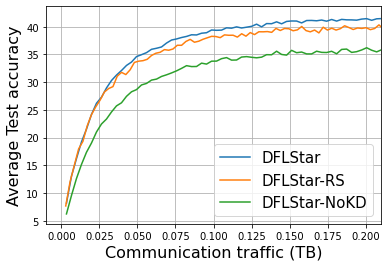

In [23]:
import os
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter

def millions_formatter(x, pos):
    return f'{x / 1e6}M'

def generate_confidence_interval(ys, number_per_g = 30, number_of_g = 1000, low_percentile = 1, high_percentile = 99):
    means = []
    mins =[]
    maxs = []
    for i,y in enumerate(ys.T):
        y = bootstrapping(y, number_per_g, number_of_g)
        #print("y:", y)
        means.append(np.mean(y))
        mins.append(np.percentile(y, low_percentile))
        #print("mins:", mins)
        maxs.append(np.percentile(y, high_percentile))
        #print("maxs:", maxs)
    return np.array(means), np.array(mins), np.array(maxs)


def read_log_file(log_file_path):
    values = []
    with open(log_file_path, 'r') as file:
        for line in file:
            value = float(line.strip())
            values.append(value)
    return values

def get_configurations(alpha, dataset):
    # Dictionary to hold configurations based on alpha and dataset
    config_options = {
#        (0.2, 'cifar10'): ['SDPS-cifar10-cnn-lastfc', 'SDPSrandom-cifar10-cnn-lastfc', 'pasgd-cifar10-cnn-alpha0.2', 'dsgd-cifar10-cnn-alpha0.2'],
#        (0.2, 'cifar100'): ['SDPS-cifar100-cnn-lastfc', 'SDPSrandom-cifar100-cnn-lastfc', 'pasgd-cifar100-cnn-alpha0.2', 'dsgd-cifar100-cnn-alpha0.2'],
#        (0.5, 'cifar10'): ['SDPS-cifar10-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar10-cnn-lastfc-alpha0.5', 'pasgd-cifar10-cnn-alpha0.5', 'dsgd-cifar10-cnn-alpha0.5'],
 #       (0.5, 'cifar100'): ['SDPS-cifar100-cnn-lastfc-alpha0.5', 'SDPSrandom-cifar100-cnn-lastfc-alpha0.5', 'pasgd-cifar100-cnn-alpha0.5', 'dsgd-cifar100-cnn-alpha0.5'],
        # ... Add other configurations ...
        (0.2, 'cifar10'): ['SDPS-cifar10-cnn-lastfc', 'SDPSrandom-cifar10-cnn-lastfc', 'SDPS-noKD-cifar10-cnn-lastfc'],
        (0.2, 'cifar100'): ['SDPS-cifar100-cnn-lastfc', 'SDPSrandom-cifar100-cnn-lastfc', 'SDPS-noKD-cifar100-cnn-lastfc']
    }
    return config_options.get((alpha, dataset), [])

datasets = ['cifar10', 'cifar100']
alphas = [0.2]
topologies = [('grid', 'grid')]  # (topology, topology_name)


time_of_accuracy = 562
time_to_accuracy = 55
size_byte_model = 3514152 
#size_byte_selection = 204800

num_devices = 16
num_epochs = 8000
#topology = 'clique-ring'
#topology_name = 'roc'
#topology = 'grid'
noniid = 0.9
num_test_folders = 5  # Number of test folders



#total_time = 562  # total duration of the experiment in seconds
#time_per_epoch = total_time / 160 






for dataset in datasets:
    for alpha in alphas:
        configurations = get_configurations(alpha, dataset)

        for topology, topology_name in topologies:        
            for config in configurations:
                if 'pasgd' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 573
                        else:
                            total_times[config] = 701
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 719
                     
                    config_labels[config] = 'PASGD'
                elif 'dsgd' in config:
                    epochs_dict[config] = 8000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 564
                        else:
                            total_times[config] = 690
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 583
                        else:
                            total_times[config] = 700
           
                    config_labels[config] = 'DSGD'
                elif 'SDPS' in config:
                    epochs_dict[config] = 4000
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 526
                        else:
                            total_times[config] = 535
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 546
                        else:
                            total_times[config] = 564
            
                    config_labels[config] = 'DFLStar'
                if 'SDPSrandom' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 524
                        else:
                            total_times[config] = 527
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 538
                        else:
                            total_times[config] = 546
                    config_labels[config] = 'DFLStar-RS'
                if 'noKD' in config:
                    if dataset == 'cifar10':
                        if topology_name == 'grid':
                            total_times[config] = 408
                        else:
                            total_times[config] = 458
                    else:
                        if topology_name == 'grid':
                            total_times[config] = 428
                        else:
                            total_times[config] = 491
                    config_labels[config] = 'DFLStar-NoKD'       
                all_tests_average_values = []
                all_tests_traffic_values = [] 

                total_time = total_times.get(config, 762)
                num_epochs = epochs_dict.get(config, 4000)

                for test_folder_num in range(1, num_test_folders + 1):
                    config_folder = f"KDD2024/pdsgd-noniid-test{test_folder_num}-{num_devices}C-{config}-{topology}-1sgd-{num_epochs}epochs"
                #config_folder = f"16_grid/pdsgd-noniid-test1-{num_devices}W-{topology}-1sgd-{num_epochs}epochs-{config}"
                    config_values = []
                    traffic_values = []

                    for device_num in range(num_devices):
                        log_file_path = os.path.join(config_folder, f"r{device_num}-testacc.log")
                        #log_file_path = os.path.join(config_folder, f"r0-testacc.log")
                        values = read_log_file(log_file_path)
                        config_values.append(values)
                        
                    if dataset == 'cifar10':
                        size_byte_selection = 20480
                        size_byte_model = 3514152
                    elif dataset == 'cifar100':
                        size_byte_selection = 204800
                        size_byte_model = 3698832
                    
                    for i in range(len(values)):
                            traffic_cost_value = traffic_cost(size_byte_model, config, topology_name, size_byte_selection, (i + 1)*50, num_devices)
                            if len(traffic_values) > i:
                                traffic_values[i] += traffic_cost_value
                            else:
                                traffic_values.append(traffic_cost_value)

                        #numepochs = len(read_log_file(log_file_path))
                        #time_per_epoch = total_time / numepochs

                    # Compute average for each epoch for the current test folder
                    average_values = [sum(epoch_values) / num_devices for epoch_values in zip(*config_values)]

                    # Aggregate the averages from this test folder
                    if all_tests_average_values:
                        all_tests_average_values = [sum(x) for x in zip(all_tests_average_values, average_values)]
                        all_tests_traffic_values = [sum(x) for x in zip(all_tests_traffic_values, traffic_values)]
                    else:
                        all_tests_average_values = average_values
                        all_tests_traffic_values = traffic_values

                # Compute the final average across all test folders
                final_average_values = [x / num_test_folders for x in all_tests_average_values]
                final_traffic_values = [x / num_test_folders for x in all_tests_traffic_values]
                #final_traffic_values = [x / num_test_folders for x in all_tests_traffic_values]
                
#                 for i, acc in enumerate(final_average_values):
#                     traffic_cost_value = traffic_cost(size_byte_model, config, size_byte_selection, i + 1, num_devices)
#                     all_tests_traffic_values.append(traffic_cost_value)

                numepochs = len(final_average_values)
                time_per_epoch = total_time / numepochs

                times = [epoch * time_per_epoch for epoch in range(1, len(final_average_values) + 1)]

                epochs = list(range(1, len(final_average_values) + 1))
                plot_epochs = epochs[:2000:]
                #rounds = np.arange(1, num_epochs + 1)  
                #plt.plot(plot_epochs, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                if config == 'SDPS-cifar10-cnn-lastfc-0.1':
                    # Plot every 50 intervals for this specific configuration
                    plt.plot(times[::50], final_average_values[::50], label=config_labels.get(config, config))
                else:
                    # Plot normally for other configurations
                    final_traffic_values_mb = [value / 1000000 for value in final_traffic_values]
                    plt.plot(final_traffic_values_mb, final_average_values, label=config_labels.get(config, config))
                    #plt.plot(times, final_average_values, label=config_labels.get(config, config))
                #plt.plot(times, [final_average_values[i - 1] for i in plot_epochs], label=config_labels.get(config, config))
                #print(f"Accuracy for {config} is {final_average_values [-1]:.2f}")
                accuracy_at_time = np.interp(time_of_accuracy, times, final_average_values)
                print(f"Accuracy for {config} at {time_of_accuracy} seconds is {accuracy_at_time:.2f}%")

                time_acc = None
                for i, acc in enumerate(final_average_values):
                    if acc >= time_to_accuracy:
                        time_acc = times[i]           
                        break

                if time_acc is not None:
                    round_to_accuracy = int(time_acc / time_per_epoch)*50
                    if dataset == 'cifar10':
                        size_byte_selection = 20480
                        size_byte_model = 3514152
                    elif dataset == 'cifar100':
                        size_byte_selection = 204800
                        size_byte_model = 3698832
                    megabytes_value = traffic_cost(size_byte_model, config, topology_name, size_byte_selection, round_to_accuracy, num_devices)

                    print(f"{config} reached {time_to_accuracy}% accuracy at {time_acc:.2f} seconds, with communication cost of {megabytes_value:.2f}, which corresponds to epoch {round_to_accuracy}.")


                else:
                    print(f"{config} did not reach the desired accuracy within the tested duration.")

                    #    megabytes_value = traffic_cost(size_byte_model, config, size_byte_selection, 2000, num_devices)
                    #    print(f"{config} reached communication cost of {megabytes_value:.2f}, which corresponds to epoch 2000")
    
            plt.ylabel('Average Test accuracy', fontsize=16 )
            plt.xlabel('Communication traffic (TB)', fontsize=16)
#            plt.xlim(left=20)
#             if dataset == 'cifar10':
#                 plt.ylim(10,80)
#             elif dataset == 'cifar100':
#                 plt.ylim(0,50)
            #plt.title('Average Test Accuracy Across Clients and Test Files')
            #plt.grid(True)
            plt.xlim(right=0.21)
            plt.grid()
            fig = plt.gcf()
            #fig.set_size_inches(18.5, 10.5)
            plt.legend(fontsize=15)
       
            #plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
            plt.savefig(f"{dataset}-ablation-traffic.pdf", bbox_inches='tight')
            plt.show()
